# Multichannel audio source separation by FastMNMF

In [1]:
import numpy as np
import scipy.signal as ss
import soundfile as sf
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
from mnmf import FastMNMF
from plotting import plot_sounds_spectrogram, plot_sounds_waveform, plot_components

## 1\. Source separation

### Target sources

In [3]:
part1, sr = sf.read("../AudioData/trimmedKorchVersion.wav")
part2, sr = sf.read("../AudioData/trimmedMatthewVersion.wav")
koeff = 1
part2 = part2[:part2.shape[0]//koeff,1]
part1 = part1[:part1.shape[0]//koeff,1]
mixture = np.vstack([part1, part2]).T

x = mixture.T
n_channels, T = x.shape
n_sources = n_channels

In [4]:
for idx in range(n_channels):
    display(ipd.Audio(x[idx], rate=sr))

In [5]:
fft_size, hop_size = 4096, 2048
NUM_ITER = 100

In [6]:
_, _, X = ss.stft(x, nperseg=fft_size, noverlap=fft_size-hop_size)

In [7]:
mnmf = FastMNMF(n_basis=2)

In [8]:
Y = mnmf(X, iteration=NUM_ITER)

In [9]:
_, y = ss.istft(Y, nperseg=fft_size, noverlap=fft_size-hop_size)
y = y[:, :T]

### Separated sources

In [10]:
for idx in range(n_sources):
    display(ipd.Audio(y[idx], rate=sr))
    wavfile.write(f"../results/NMFspeach_part_{idx}_iter_{NUM_ITER}.wav", sr, (32767*y[idx]).astype(np.int16))

/home/sviat/code/la/Project/AudioSourceSeparation/NMF/plotting.py:15: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(audio_sound, sr=sr, ax=ax, x_axis='time', color=color)


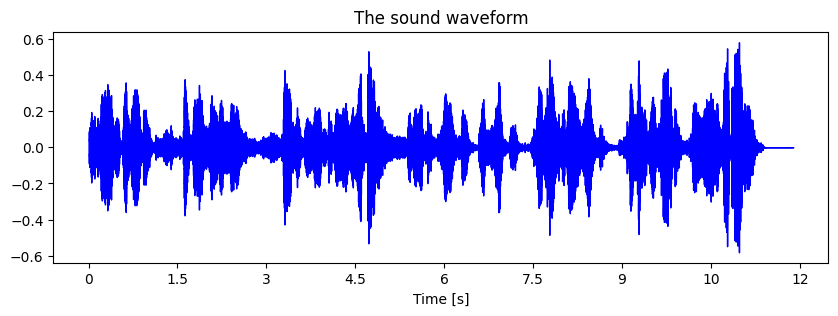

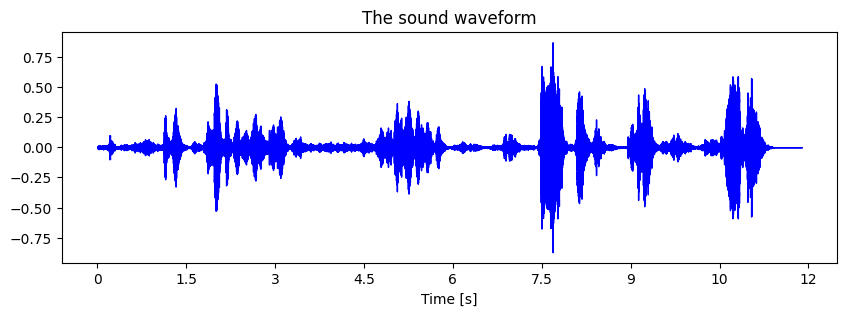

In [13]:
for idx in range(n_sources):
    plot_sounds_waveform(*sf.read(f"../results/NMFspeach_part_{idx}_iter_100.wav"))


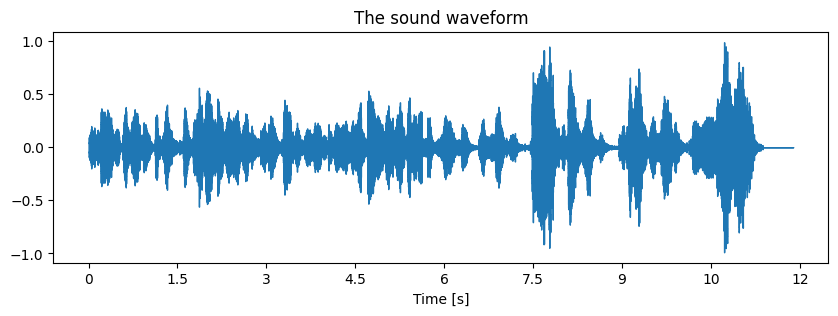

In [20]:
data, sr = sf.read("../AudioData/trimmedKorchVersion.wav")
plot_sounds_waveform(data[:, 0], sr)